# Дроздов Дмитрий
## Б01-908
---
### № VIII.11.5 (Вариант 5)

Методами разных порядков решить систему Лоренца: \
$ x' = -\sigma (x - y) $,                        \
$ y' = -xz + rx - y $,                           \
$ z' = xy - bz $,                                \
$ x(0) = y(0) = z(0) = 1 $                       \
при $ b = 8/3, \sigma = 10, r = 28, 0 < t \le 50 $.

Будет использован метод Рунге-Кутты с матриценй 4-го порядка ($s = 4$) и удовл. условию Кутты ($ c_j = \sum_{k=1}^{s}a_{jk} $)

Таблица условий на порядок: \
* p = 1 \
$ \sum_{j=1}^{s} b_j = 1 $

* p = 2 \
$ \sum_{j=1}^{s} b_j c_j = 1/2 $

* p = 3 \
$ \sum_{j=1}^{s} b_j c_j ^ 2 = 1 / 3 $ and $ \sum_{j=1}^{s} \sum_{k=1}^{s}b_j a_{jk} c_k = 1/6 $


### Немного кода, определяющего абстракцию для метода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
b = 8 / 3
sigma = 10
# интересно его поварьировать, совпадает с рисунками на wiki =)
r = 28

t_min = 0
t_max = 50
Y0 = [1, 1, 1]

# сама система
def dx(x_, y_, z_):
  return -sigma * (x_ - y_)
def dy(x_, y_, z_):
  return -x_ * z_ + r * x_ - y_
def dz(x_, y_, z_):
  return x_ * y_ - b * z_ 

def F(t, u):
  x = dx(u[0], u[1], u[2])
  y = dy(u[0], u[1], u[2])
  z = dz(u[0], u[1], u[2])
  return [x,y,z]


In [ ]:

class RungeKutta:

  # matr - матрица метода РК. Матрица состоит из первого столбца - 'С', последней строки - 'в' и все остальное - 'а'
  # t0 - начальное время
  # Y0 - начальные условия
  # F - правая часть системы
  def __init__(self, matr, t0, Y0, F):
    # коэффициенты из матрицы метода
    self.S = len(matr) - 1
    self.C = matr[:self.S, 0].T.tolist()[0]
    self.B = matr[self.S, 1:].tolist()[0]
    self.A = matr[:self.S, 1:]
    self.explicit = RungeKutta.isExplicit(matr)
    # текущее решение (равно начальному)
    self.Y = Y0
    self.DY = F(t0, Y0)
    # текущее время
    self.t = t0
    self.t_trace = [t0]

    self.x_trace = [self.Y[0]]
    self.y_trace = [self.Y[1]]
    self.z_trace = [self.Y[2]]

    self.dx_trace = [self.DY[0]]
    self.dy_trace = [self.DY[1]]
    self.dz_trace = [self.DY[2]]

    # правая часть системы
    self.F = F


  def isExplicit(matr):
    N = len(matr)

    for l in range(0, N):
      for c in range(l + 1, N):
        if matr[l, c] != 0:
          return False
    return True


  # dt - шаг
  def NextStep(self, dt):
    if dt < 0:
      return;
    if not self.explicit:
      raise IOError("Неявный метод!! Это вторая лаба")

    N = len(self.Y)

    # получаем значения K на каждой стадии
    K = [None] * self.S
    YN = self.Y
    for s in range(0, self.S):
      t_s = self.C[s] * dt
      YY = [None] * N

      YY = YN
      for j in range(0, s):
        YY += self.A[s, j] * dt * np.copy(K[j])
      
      K[s] = self.F(t_s, YY)
    
    # высчитываем y_{n+1}
    for s in range(0, self.S):
      self.Y += dt * self.B[s] * np.copy(K[s]) 

    self.DY = self.F(self.t, self.Y)
    self.dx_trace.append(self.DY[0])
    self.dy_trace.append(self.DY[1])
    self.dz_trace.append(self.DY[2])

    self.x_trace.append(self.Y[0])
    self.y_trace.append(self.Y[1])
    self.z_trace.append(self.Y[2])

    self.t += dt
    self.t_trace.append(self.t)


  # запустить сразу несколько стадин с одинаковым шагом
  def start(self, step, t_end):
      arr = np.arange(self.t, t_end + step, step)
      n = len(arr)

      for i in range(1, n):
        self.NextStep(step)


In [ ]:
def plot_3d(x_, y_, z_, labels=['X', 'Y', 'Z']):
  fig = plt.figure(figsize=[18, 10])
  ax = fig.add_subplot(projection='3d')

  ax.plot(x_, y_, z_, label='solution')
  ax.set_xlabel(labels[0], fontsize=15)
  ax.set_ylabel(labels[1], fontsize=15)
  ax.set_zlabel(labels[2], fontsize=15)
  plt.draw()
  plt.show()

## Матрицы метода и результаты

### P = 1

In [ ]:
rkm = np.matrix([
    [  0,   0],
    [  0,   1]
])

rk = RungeKutta(rkm, t_min, Y0, F)
rk.start(0.01, t_max)

#### Траектория

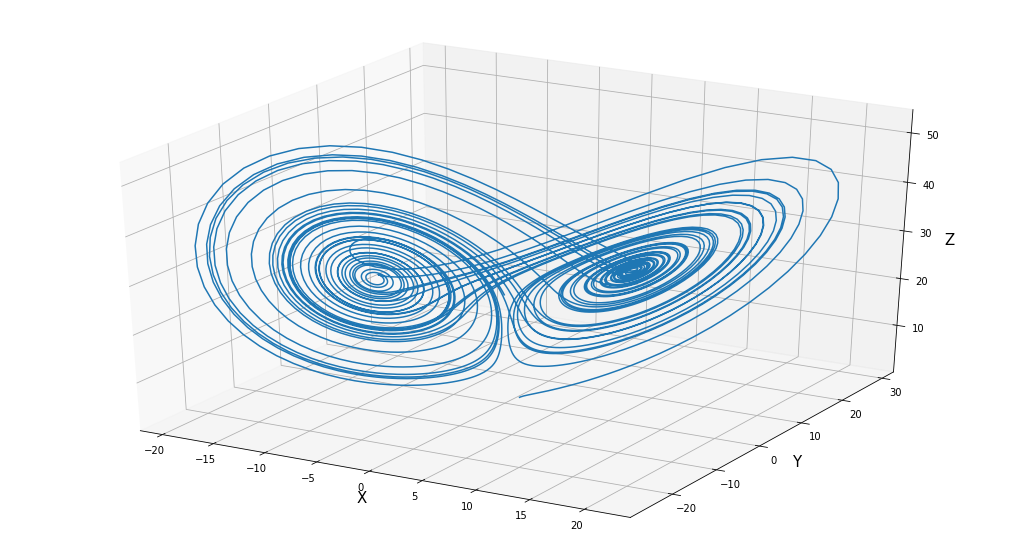

In [ ]:
plot_3d(rk.x_trace, rk.y_trace, rk.z_trace)

#### Фазовое пространство


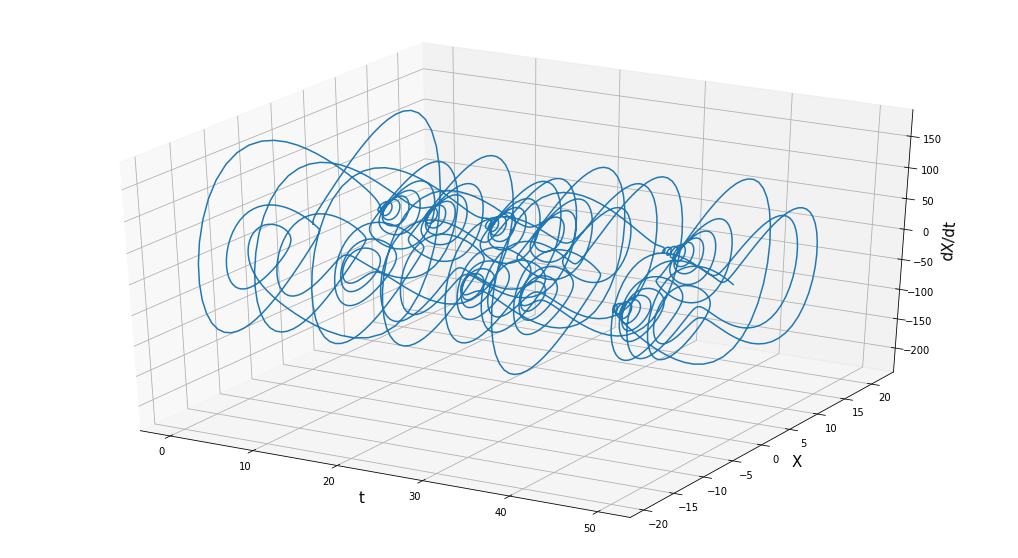

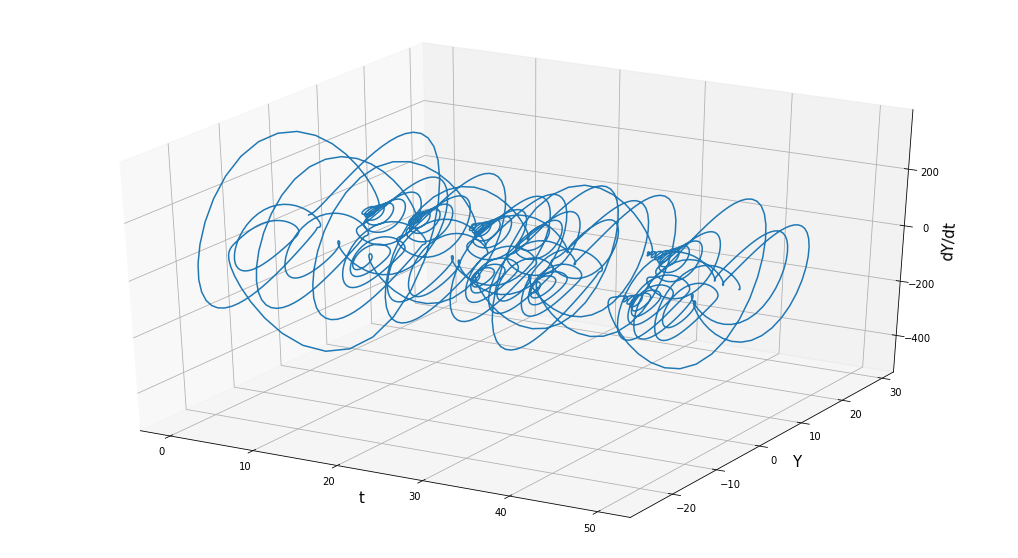

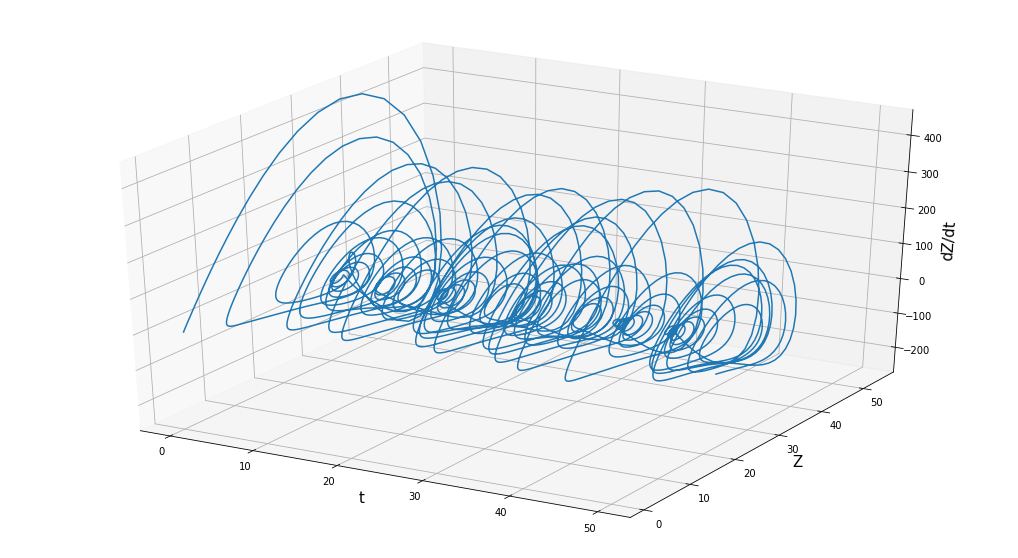

In [ ]:
plot_3d(rk.t_trace, rk.x_trace, rk.dx_trace, ['t', 'X', 'dX/dt'])
plot_3d(rk.t_trace, rk.y_trace, rk.dy_trace, ['t', 'Y', 'dY/dt'])
plot_3d(rk.t_trace, rk.z_trace, rk.dz_trace, ['t', 'Z', 'dZ/dt'])

### P = 2


In [ ]:
rkm = np.matrix([
    [  0,   0,   0],
    [  1,   1,   0],
    [  0, 1/2, 1/2]
])

rk2 = RungeKutta(rkm, t_min, Y0, F)
rk2.start(0.0001, t_max)

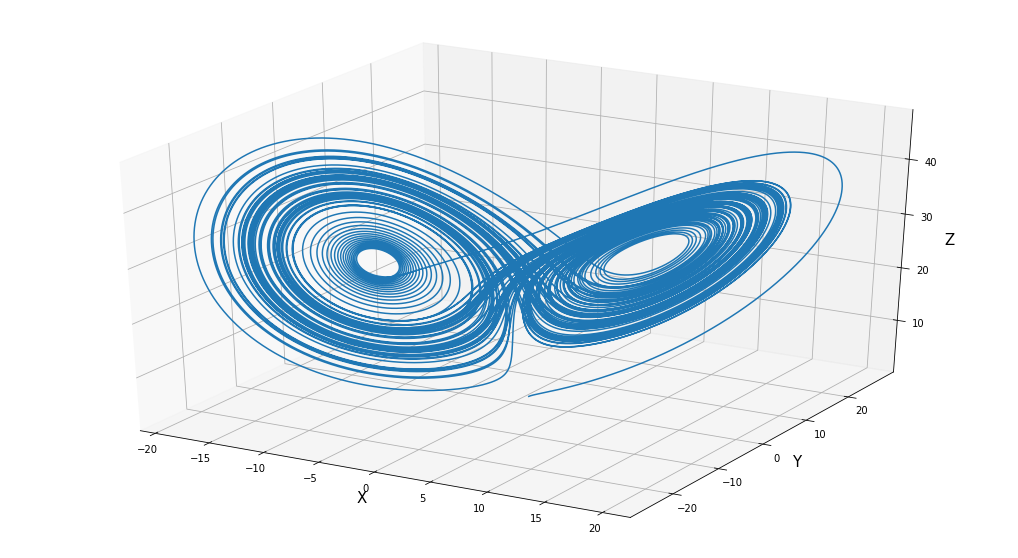

In [ ]:
plot_3d(rk2.x_trace, rk2.y_trace, rk2.z_trace)

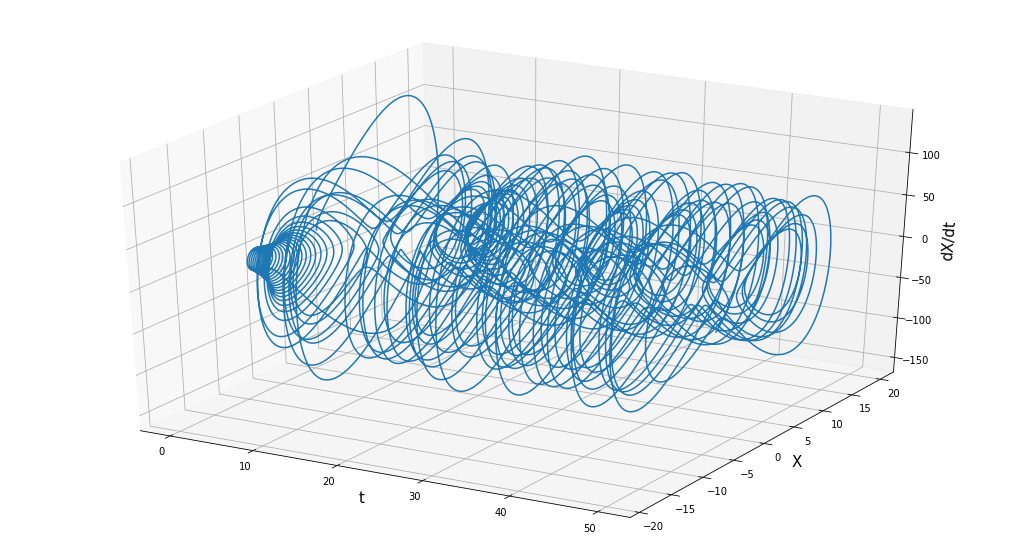

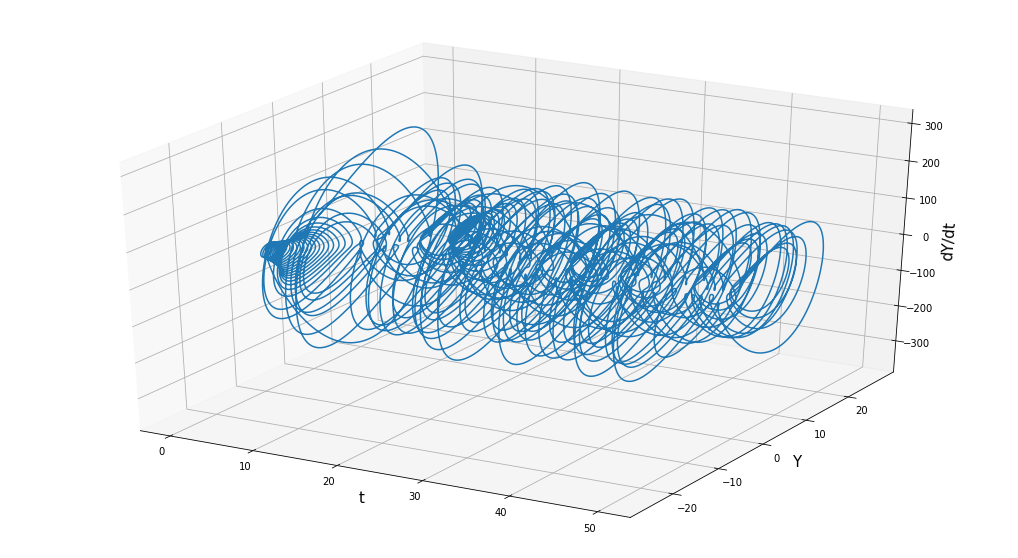

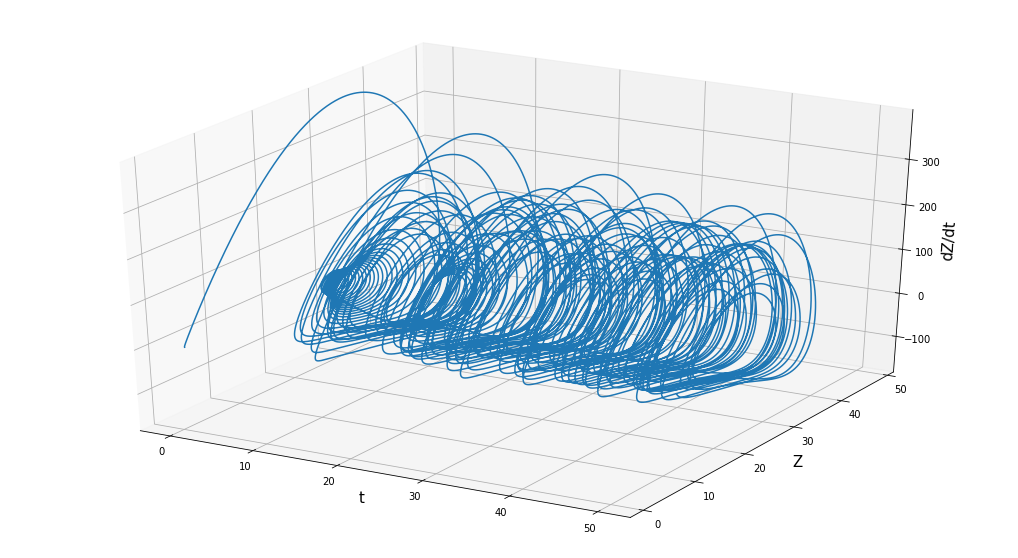

In [ ]:
plot_3d(rk2.t_trace, rk2.x_trace, rk2.dx_trace, ['t', 'X', 'dX/dt'])
plot_3d(rk2.t_trace, rk2.y_trace, rk2.dy_trace, ['t', 'Y', 'dY/dt'])
plot_3d(rk2.t_trace, rk2.z_trace, rk2.dz_trace, ['t', 'Z', 'dZ/dt'])

### P = 3

In [ ]:
rkm = np.matrix([
    [  0,   0,   0,   0],
    [1/3, 1/3,   0,   0],
    [2/3,   0, 2/3,   0],
    [  0, 1/4,   0, 3/4]
])

rk3 = RungeKutta(rkm, t_min, Y0, F)
rk3.start(0.0001, t_max)

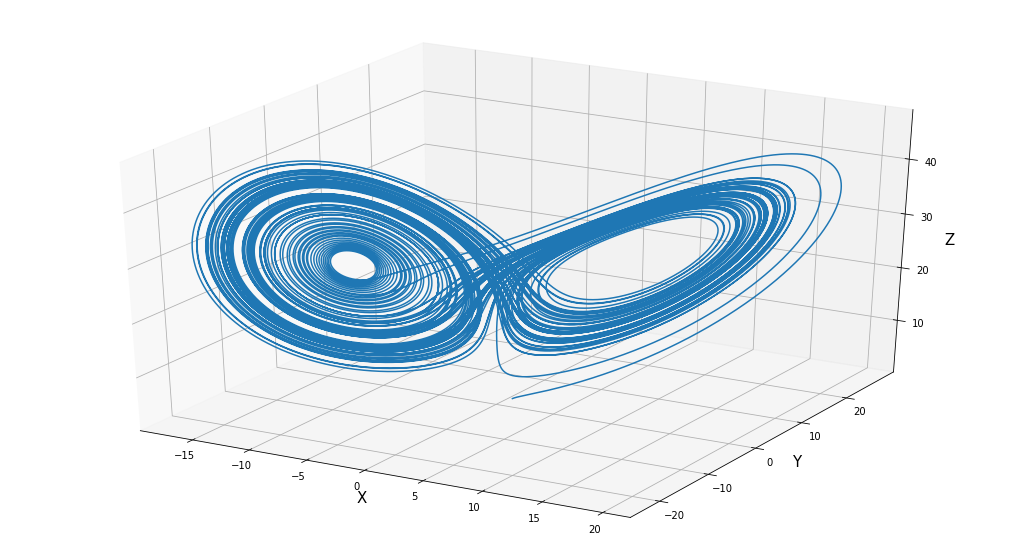

In [ ]:
plot_3d(rk3.x_trace, rk3.y_trace, rk3.z_trace)

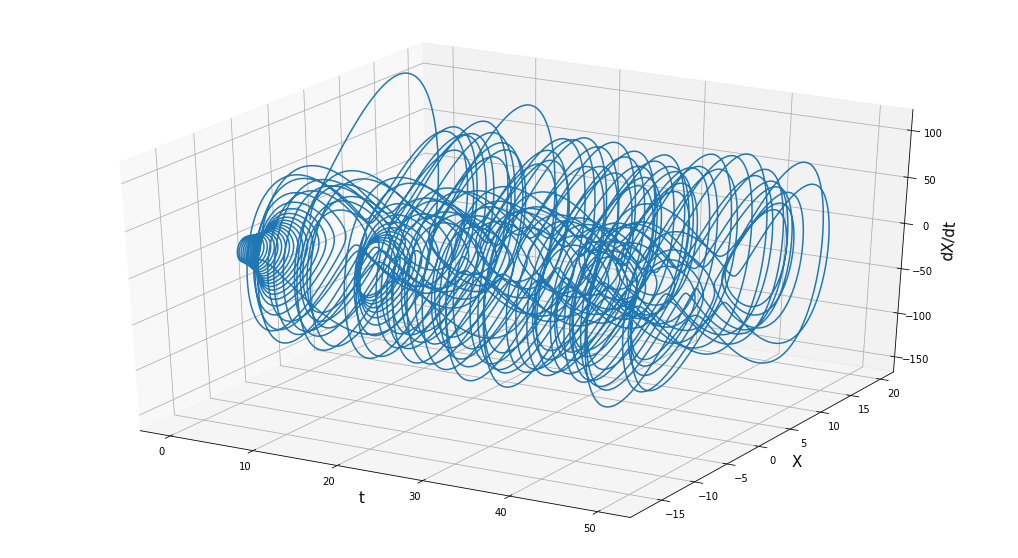

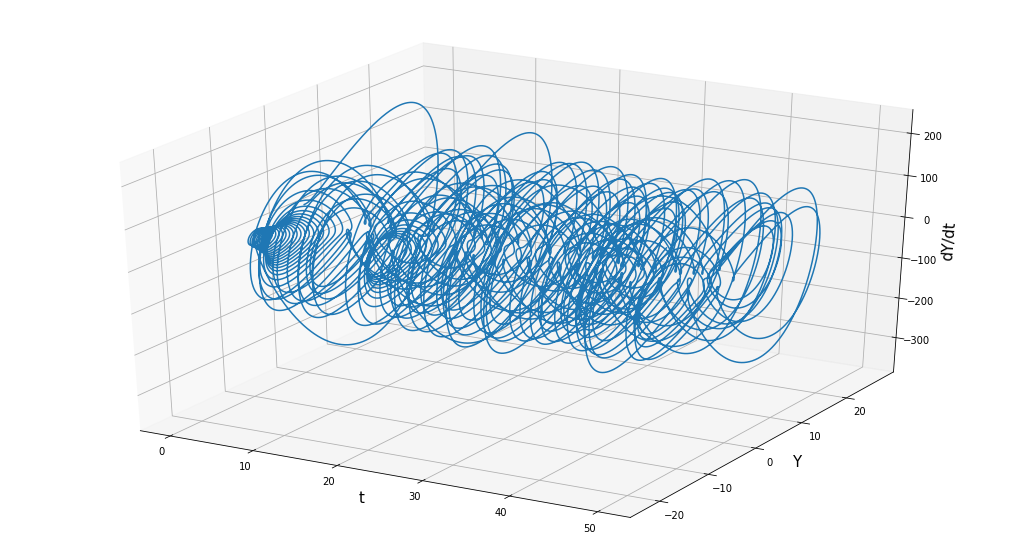

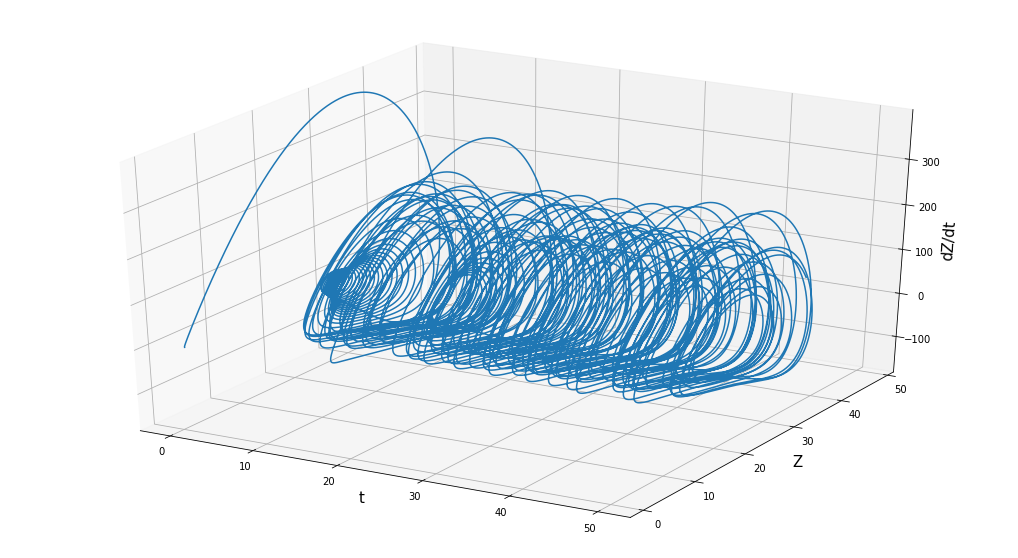

In [ ]:
plot_3d(rk3.t_trace, rk3.x_trace, rk3.dx_trace, ['t', 'X', 'dX/dt'])
plot_3d(rk3.t_trace, rk3.y_trace, rk3.dy_trace, ['t', 'Y', 'dY/dt'])
plot_3d(rk3.t_trace, rk3.z_trace, rk3.dz_trace, ['t', 'Z', 'dZ/dt'])

### P = 4